ΣΚΛΑΒΕΝΙΤΗΣ ΓΙΩΡΓΟΣ     
ΑΕΜ 10708

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve

In [27]:
#Παραγοντοποιήσεις LU και QR

def LUmine(A):
    n = A.shape[0]
    L = np.identity(n)
    U = np.copy(A)
    for k in range(n-1):
        for i in range(k+1, n):
            L[i, k] = U[i, k] / U[k, k]
            for j in range(k, n):
                U[i, j] = U[i, j] - L[i, k] * U[k, j]

    return L, U

def QRmine(A):
    n = A.shape[0]
    Q = np.zeros((n, n))
    for j in range(n):
        q = A[:, j].copy()
        for i in range(j):
            length_of_leg = np.sum(q * Q[:, i])
            q = q - length_of_leg * Q[:, i]
        Q[:, j] = q / np.linalg.norm(q)
    R = Q.T @ A
    return Q, R

#Παρακάτω ελέγχω αν η συνάρτησή μου είναι σωστή
A = np.random.rand(5, 5)
Q, R = QRmine(A)
A_reconstructed = Q @ R
is_equal = np.allclose(A, A_reconstructed)
print("QR decomposition is correct:", is_equal)

QR decomposition is correct: True


[1.1102230246251565e-15, 7.105427357601002e-15, 2.1316282072803006e-14, 4.547473508864641e-13, 2.2282620193436742e-11, 5.975380190648139e-10, 1.501757651567459e-08, 4.132161848247051e-07, 1.0420102626085281e-05, 0.00024097319692373276, 0.005402721464633942, 0.09301245212554932, 0.6325639486312866, 0.4689507484436035, 0.843867838382721, 30.03991985321045, 21.455901473760605, 28.424888134002686, 8.67820143699646, 12.561930894851685, 40.61404037475586, 63.89095449447632, 76.5198323726654, 43.67159825563431, 174.57707405090332, 153.55683135986328, 87.94247126579285, 1207.732307434082, 44.36852467060089, 41.013548254966736, 75.27568459510803, 100.49901151657104, 102.73064851760864, 564.7490539550781, 422.66638374328613, 3908.4807777404785, 269.9942464828491, 387.03852462768555, 261.761079788208, 177.5537347793579, 131.6353747844696, 112.18692535161972, 845.3447847366333, 559.329083442688, 382.9361753463745, 403.6628952026367, 206.40034580230713, 87.8014554977417, 376.4614362716675, 148.8996

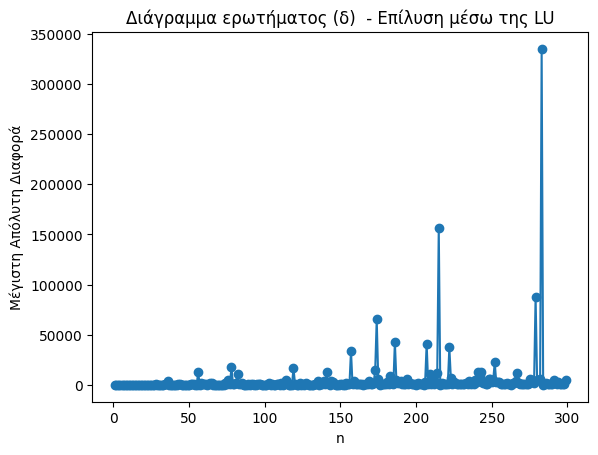

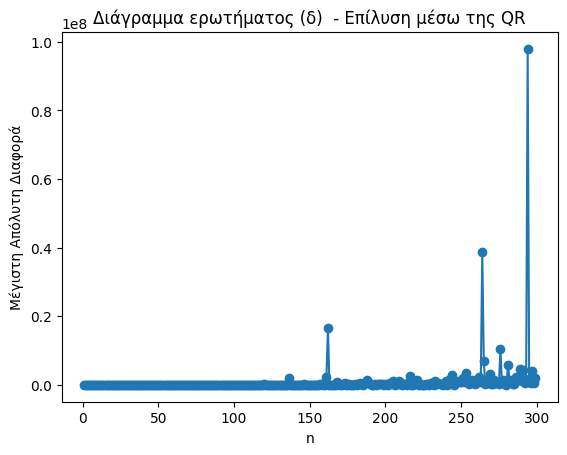

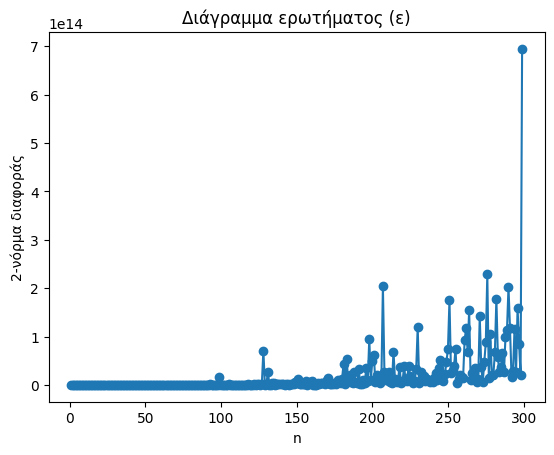

In [28]:
#Πίνακες Hilbert

def create_hilbert_matrix(n): #Δημιουργία πίνακα Hilbert - Ερώτημα (α)
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = 1 / (i + j + 1)
    return H

def solve_system(A, b): #Μέθοδος επίλυσης συστήματος - Ερώτημα (β)
    L, U = LUmine(A)
    y = np.linalg.solve(L, b)
    x = np.linalg.solve(U, y)
    return x

def solve_system2(A, b): #Μέθοδος επίλυσης συστήματος - Ερώτημα (β) - 2ος τρόπος
    Q, R = QRmine(A)
    x = np.linalg.solve(R, Q.T @ b)
    return x
    
    
n_range = range(1,100) #Οι τιμές του n 
absolute_diff_1 = [] #Δημιουργώ μία κενή λίστα, την οποία θα χρησιμοποιήσω μετά για να αποθηκεύσω τις τιμές της απόλυτης διαφοράς
absolute_diff_2 = []
twonorm_diff = [] #Όμοια, σε αυτή τη κενή λίστα θα αποθηκευτούν οι τιμές της 2-νόρμας

for n in n_range:
    H = create_hilbert_matrix(n)

    #Επίλυση με τον 1ο τρόπο (Παραγοντοποίηση LU)
    b1 = np.ones((n, 1))
    x1 = solve_system(H, b1)
    b1_new = b1.copy()  # Δημιουργία αντιγράφου του b
    b1_new[0] = b1[0] + 1e-15  # Αλλαγή του πρώτου στοιχείου του b
    x1_new = solve_system(H, b1_new) 
    difference1 = np.max(np.abs(x1 - x1_new))
    absolute_diff_1.append(difference1) #Προσθέτω κάθε τιμή της difference που δημιουργείται για τα διάφορα n στο τέλος της λίστας absolute_diff
    
    #Επίλυση με τον 2ο τρόπο (Παραγοντοποίηση QR)
    b2 = np.ones((n, 1))
    x2 = solve_system2(H, b2)
    b2_new = b2.copy()  # Δημιουργία αντιγράφου του b
    b2_new[0] = b2[0] + 1e-15  # Αλλαγή του πρώτου στοιχείου του b
    x2_new = solve_system2(H, b2_new) 
    difference2 = np.max(np.abs(x2 - x2_new))
    absolute_diff_2.append(difference2) #Προσθέτω κάθε τιμή της difference που δημιουργείται για τα διάφορα n στο τέλος της λίστας absolute_diff
        
    H_inverse = np.linalg.inv(H) #Ερώτημα (ε)
    norm_diff = np.linalg.norm(np.identity(n) - H_inverse @ H, 2)
    twonorm_diff.append(norm_diff)
    
print(absolute_diff_1)
print(absolute_diff_2)

#Δημιουργία των διαγραμμάτων που ζητούνται στα ερωτήματα (δ) και (ε)
plt.plot(n_range, absolute_diff_1, marker='o')
plt.xlabel('n')
plt.ylabel('Μέγιστη Απόλυτη Διαφορά')
plt.title('Διάγραμμα ερωτήματος (δ)  - Eπίλυση μέσω της LU')
plt.show()

plt.plot(n_range, absolute_diff_2, marker='o')
plt.xlabel('n')
plt.ylabel('Μέγιστη Απόλυτη Διαφορά')
plt.title('Διάγραμμα ερωτήματος (δ)  - Eπίλυση μέσω της QR')
plt.show()

plt.plot(n_range, twonorm_diff, marker='o')
plt.xlabel('n')
plt.ylabel('2-νόρμα διαφοράς')
plt.title('Διάγραμμα ερωτήματος (ε)')
plt.show()




Συμπλήρωση ερωτήματος (γ):
    
    Παρατηρούμε ότι η μέγιστη απόλυτη διαφορά είναι σχετικά μικρό νούμερο για μικρά n, σχεδόν μηδενική. 
    Η μεταβολή που κάναμε στο διάνυσμα b είναι πολύ μικρή (10^(-15)), αλλά μπορεί να επηρεάσει την ακρίβεια της λύσης. Έτσι, αναμένουμε μια μικρή αλλαγή στη λύση x. Βέβαια όσο αυξάνει το n τόσο μεγαλύτερη περιμένουμε να γίνεται, αφού εξαρτάται από την ακρίβεια της επίλυσης του συστήματος. Επομένως, θα περιμένουμε ότι η μέγιστη απόλυτη διαφορά ανάμεσα στην αρχική λύση και την τροποποιημένη λύση θα παραμένει μικρή, ίσως με μερικές μεγαλύτερες αποκλίσεις όσο αυξάνεται το n. 

Συμπλήρωση ερωτήματος (δ): 
    
    Από το διάγραμμα προκύπτει ότι η μέγιστη απόλυτη διαφορά αυξάνεται όσο αυξάνεται το n. Αυτό δηλώνει ότι όσο μεγαλύτερο είναι το μέγεθος του πίνακα Hilbert, τόσο μεγαλύτερη είναι και η αστάθεια στους υπολογισμούς.  
    Παράλληλα παρατηρούμε την περίεργη συμπεριφορά που παρουσιάζουν οι πίνακες Hilbert, καθώς οι τάξεις μεγέθους της μέγιστης απόλυτης διαφοράς είναι πολύ μεγάλες και το διάγραμμα δεν παρουσιάζει ομαλότητα ως προς την εναλλαγή ανάλογα με τις τιμές του n. 

Συμπλήρωση ερωτήματος (ε):

    Παρατηρούμε ξανά ότι όσο αυξάνεται το n, οι αποκλίσεις γίνονται μεγαλύτερες. Αυτό σημαίνει ότι η ακρίβεια της αντιστροφής των πινάκων Hilbert μειώνεται όσο αυξάνεται το μέγεθος του συστήματος. 
    Επομένως, η ακρίβεια υπολογισμού της αντιστροφής μειώνεται και οι προσεγγίσεις των τιμών των στοιχείων του αντίστροφου πίνακα γίνονται πιο ασταθείς.

        4         3         2
-2.262 x + 11.54 x - 10.96 x + 0.05781 x + 1.006

        4         3         2
-2.262 x + 11.54 x - 10.96 x + 0.05781 x + 1.006

Άθροισμα τετραγωνικών σφαλμάτων (LU): 0.647309687916902
Άθροισμα τετραγωνικών σφαλμάτων (QR): 0.6473096879169021


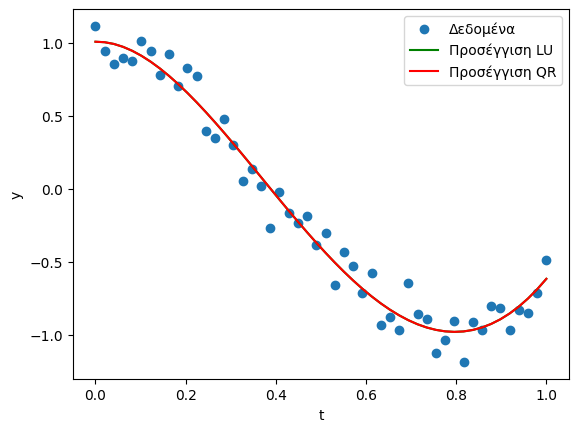

In [29]:
#Πρόβλημα προσέγγισης

#Χρησιμοποιώ τις συναρτήσεις της Python, ως εναλλακτική για να συγκλίνει η προσέγγιση περισσότερο. Παρακάτω παραθέτω και τον κώδικα με χρήση των συναρτήσεών σας.

t = np.linspace(0, 1, 50)
y = np.cos(4*t) + 0.1*np.random.randn(t.shape[0])

A = np.vander(t, 5, increasing=True) # Δημιουργία του πίνακα Vandermonde
A_transpose = np.transpose(A)
A_new = A_transpose @ A

lu, piv = lu_factor(A_new) #Παραγοντοποίηση LU
b = np.dot(A_transpose, y) 
x1 = lu_solve((lu, piv), b)
poly1 = np.poly1d(x1[::-1]) #Υπολογισμός του πολυωνύμου βαθμού 4 που προσεγγίζει βέλτιστα την συνάρτηση. Επίσης αντιστρέφω την φορά των συντελεστών του πολυωνύμου, γιατί έτσι απαιτούνταν με την χρήση των συναρτήσεων της Python
print(poly1)
print()
approximation1 = poly1(t)
errors1 = (approximation1 - y) ** 2
total_error1 = np.sum(errors1)

Q, R = np.linalg.qr(A_new) #Παραγοντοποίηση QR 
x2 = np.linalg.solve(R, Q.T @ A_transpose  @ y)
poly2 = np.poly1d(x2[::-1]) #Υπολογισμός του πολυωνύμου βαθμού 4 που προσεγγίζει βέλτιστα την συνάρτηση. Επίσης αντιστρέφω την φορά των συντελεστών του πολυωνύμου, γιατί έτσι απαιτούνταν με την χρήση των συναρτήσεων της Python
print(poly2)
print()
approximation2 = poly2(t)
errors2 = (approximation2 - y) ** 2
total_error2 = np.sum(errors2)

print("Άθροισμα τετραγωνικών σφαλμάτων (LU):", total_error1)
print("Άθροισμα τετραγωνικών σφαλμάτων (QR):", total_error2)

plt.scatter(t, y, label='Δεδομένα')
plt.plot(t, approximation1, 'g', label='Προσέγγιση LU')
plt.plot(t, approximation2, 'r', label='Προσέγγιση QR')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()




        4        3         2
-9.563 x + 26.1 x - 20.53 x + 2.302 x + 0.9107

        4        3         2
-9.563 x + 26.1 x - 20.53 x + 2.302 x + 0.9107

Άθροισμα τετραγωνικών σφαλμάτων (LU): 0.37444584989265284
Άθροισμα τετραγωνικών σφαλμάτων (QR): 0.37444584989265406


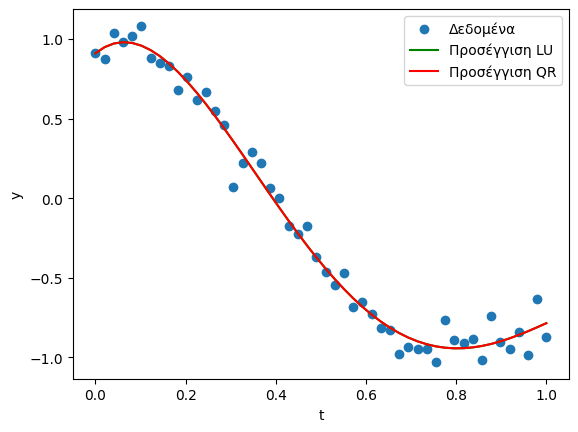

In [30]:
#Πρόβλημα προσέγγισης2
t = np.linspace(0, 1, 50)
y = np.cos(4*t) + 0.1*np.random.randn(t.shape[0])

A = np.vander(t, 5) # Δημιουργία του πίνακα Vandermonde
A_transpose = np.transpose(A)
A_new = A_transpose @ A

L, U = LUmine(A_new) #Παραγοντοποίηση LU
b = A_transpose @ y.reshape(50,1)    
z = np.linalg.solve(L, b)
x1 = np.linalg.solve(U, z).ravel()
poly1 = np.poly1d(x1) #Υπολογισμός του πολυωνύμου βαθμού 4 που προσεγγίζει βέλτιστα την συνάρτηση.
print(poly1)
print()
approximation1 = poly1(t)
errors1 = (approximation1 - y) ** 2
total_error1 = np.sum(errors1)

Q, R = QRmine(A_new) #Παραγοντοποίηση QR 
x2 = np.linalg.solve(R, Q.T @ A_transpose  @ y)
poly2 = np.poly1d(x2) #Υπολογισμός του πολυωνύμου βαθμού 4 που προσεγγίζει βέλτιστα την συνάρτηση.
print(poly2)
print()
approximation2 = poly2(t)
errors2 = (approximation2 - y) ** 2
total_error2 = np.sum(errors2)

print("Άθροισμα τετραγωνικών σφαλμάτων (LU):", total_error1)
print("Άθροισμα τετραγωνικών σφαλμάτων (QR):", total_error2)

plt.scatter(t, y, label='Δεδομένα')
plt.plot(t, approximation1, 'g', label='Προσέγγιση LU')
plt.plot(t, approximation2, 'r', label='Προσέγγιση QR')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()


